# Audio Signal Processing for Bird Sound Isolation

Writer: E.W

Date: 07/16

## Set Up the Environment

In [ ]:
!pip install numpy scipy matplotlib ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy. io import wavfile
from scipy.fft import fft
from scipy.fftpack import fftfreq
from scipy. signal import butter, filtfilt, freqz
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Workspace preparation
import os, sys
root_dir = '/content/drive/MyDrive/Colab_Notebooks/AI_Audio'
data_dir = os.path.join(root_dir,'data')
out_dir = os.path.join(root_dir,'output')
os.makedirs(out_dir, exist_ok = True)
for file in os.listdir(data_dir):
    filepath=os.path.join(data_dir, file)


## Load the Audio File:

In [ ]:
# Load file
sampling_rate, data = wavfile.read(filepath)
sampling_rate, data, data.shape[0]

(48000, array([  0,   0,   0, ..., -53, -54, -54], dtype=int16), 1602560)

## Plot Time and Frequency Representations:

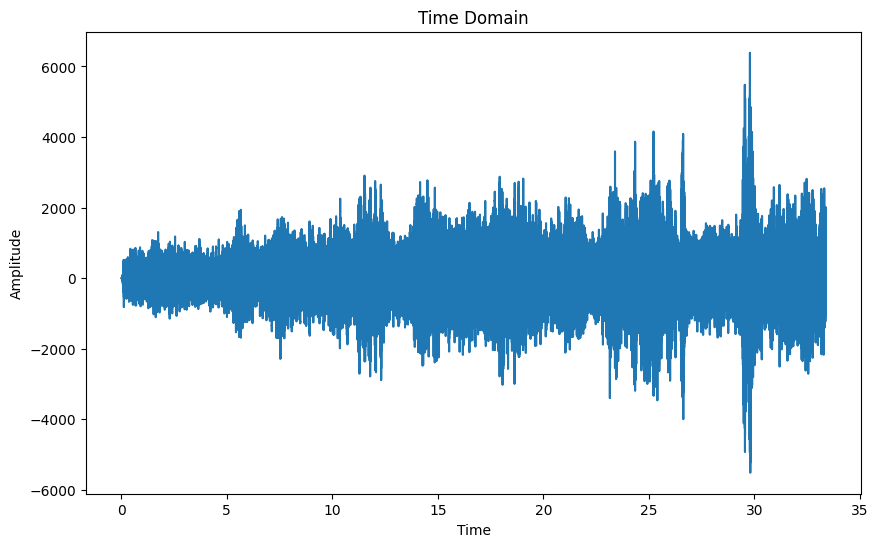

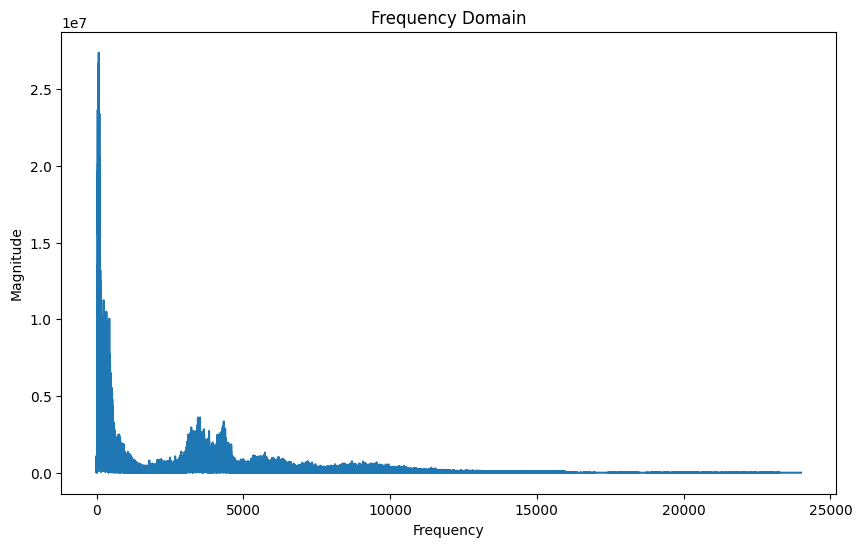

In [40]:
def plot_time_frequency(data, sampling_rate):
    length = data.shape[0] / sampling_rate
    time = np.linspace(0., length, data.shape[0])

    # Time domain plot
    plt.figure(figsize = (10,6))
    plt.plot(time, data)
    plt.title('Time Domain')
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

    # Frequency domain plot
    yf = fft(data)
    xf = fftfreq(data.shape[0], 1 / sampling_rate)

    plt.figure(figsize = (10,6))
    plt.plot(xf[:len(xf)//2], np.abs(yf[:len(xf)//2]))
    plt.title('Frequency Domain')
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

plot_time_frequency(data, sampling_rate)

## Nyquist Theorem
The Nyquist theorem states that to accurately sample a signal, the sampling rate must be at least twice the maximum frequency present in the signal. If this condition is not met, aliasing occurs, which results in different signals becoming indistinguishable when sampled.

$F_{max}=F_{nyquist} = \frac {F_{sample}} {2} $

In [ ]:
# get Fnyquist
def get_nyquist(sampling_rate):
    return sampling_rate/2

## Isolate Bird Sounds

In [ ]:
# bandpass
def bandpass_filter(data, sampling_rate, low, high, order=5):
    nyquist = get_nyquist(sampling_rate)
    low = low / nyquist
    high = high / nyquist
    b, a = butter(order, [low, high], btype='band') # IIR
    res = filtfilt(b, a, data)
    return res, b, a

In [ ]:
# plot fileter
def plot_filter(b, a, sampling_rate, label = 5):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(10, 6))
    plt.plot((get_nyquist(sampling_rate) / np.pi) * w, np.abs(h))
    plt.title(f'Bandpass Filter Frequency, order={label}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

In [ ]:
def plot_signal_and_filter(data, sampling_rate, filtered_data, b, a, label=5):
    N = len(data)
    T = 1.0 / sampling_rate

    # Compute FFT of the original and filtered signal
    yf_original = fft(data)[:N // 2]
    yf_filtered = fft(filtered_data)[:N // 2]
    scale_factor = np.max(np.abs(yf_original)) / np.max(np.abs(yf_filtered))
    yf_filtered = yf_filtered * scale_factor
    xf = fftfreq(N, T)[:N // 2]

    # Compute the filter's frequency response
    w, h = freqz(b, a, worN=8000)
    freqs = (sampling_rate * 0.5 / np.pi) * w

    plt.figure(figsize=(10, 6))

    # Plot FFT of the original signal
    plt.plot(xf, np.abs(yf_original), label='Original Signal')

    # Plot FFT of the filtered signal
    plt.plot(xf, np.abs(yf_filtered), label=f'Filtered Signal, order={label}', color = 'grey')

    plt.title('FFT of Original and Filtered Signals')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# experiments with different orders
bf3, b3, a3 = bandpass_filter(data, sampling_rate, 1000, 8000, 3)
bf5, b5, a5 = bandpass_filter(data, sampling_rate, 1000, 8000, 5)
bf7, b7, a7 = bandpass_filter(data, sampling_rate, 1000, 8000, 7)

In [ ]:
bf3.shape, b3.shape, a3.shape

((1602560,), (7,), (7,))

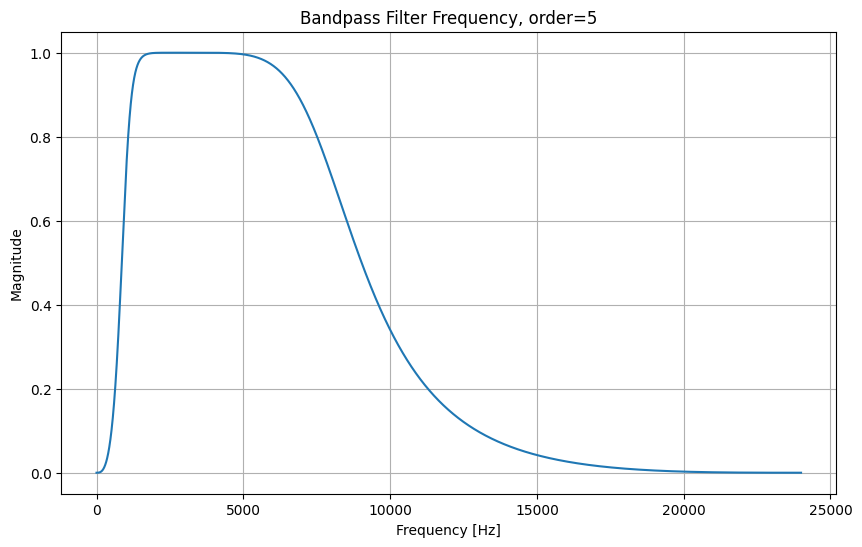

In [ ]:
plot_filter(b3, a3, sampling_rate)

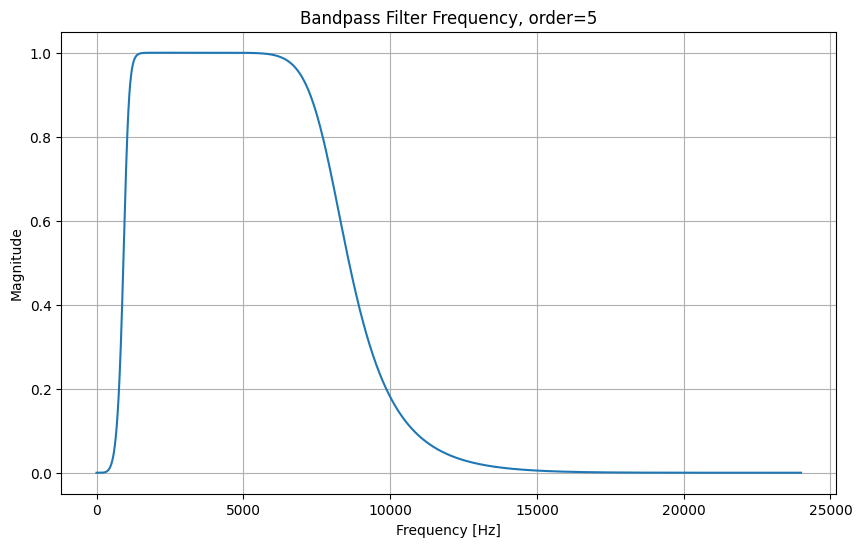

In [ ]:
plot_filter(b5, a5, sampling_rate)

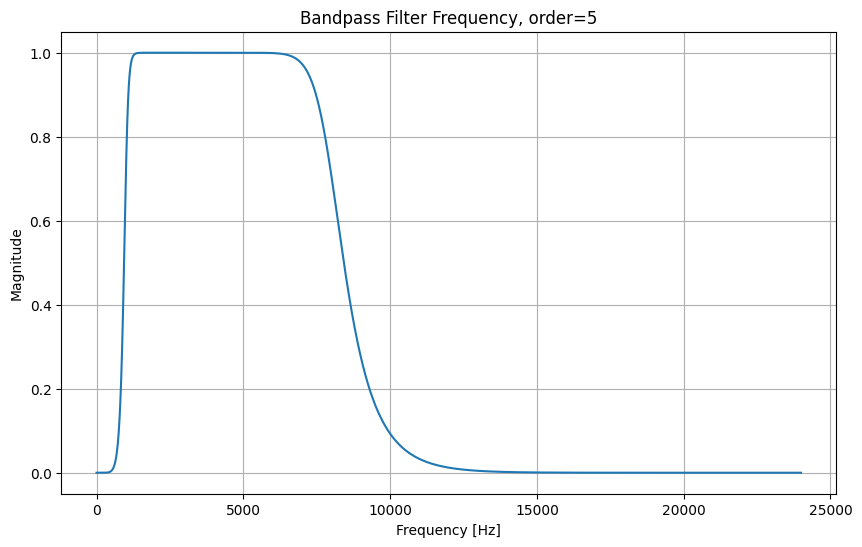

In [ ]:
plot_filter(b7, a7, sampling_rate)

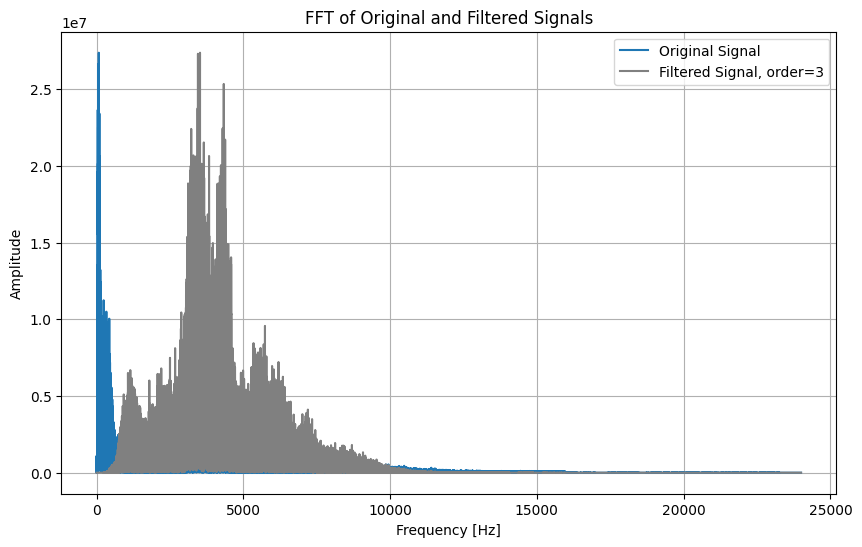

In [ ]:
plot_signal_and_filter(data, sampling_rate, bf3, b3, a3, label=3)

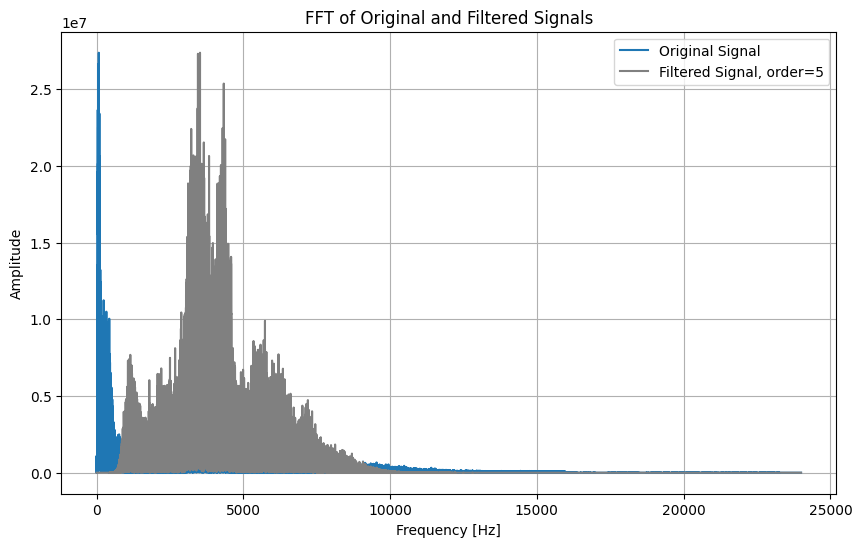

In [ ]:
plot_signal_and_filter(data, sampling_rate, bf5, b5, a5, label=5)

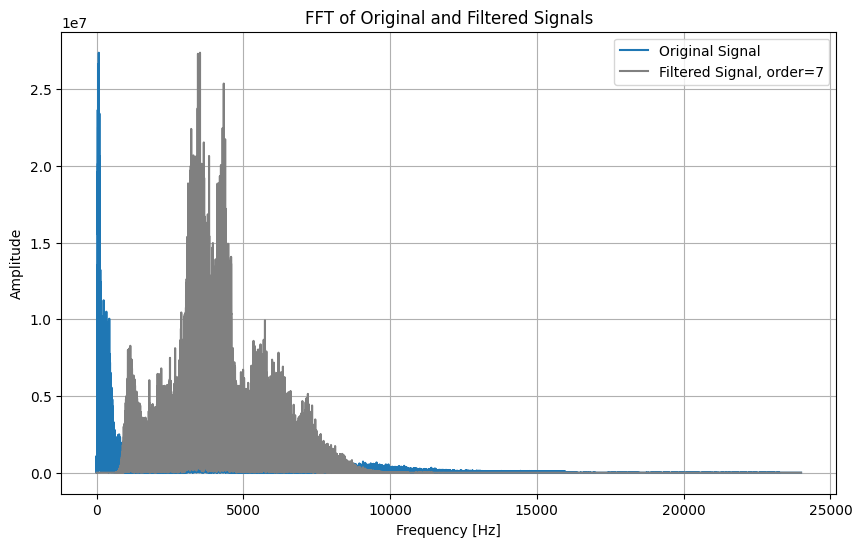

In [ ]:
plot_signal_and_filter(data, sampling_rate, bf7, b7, a7, label=7)

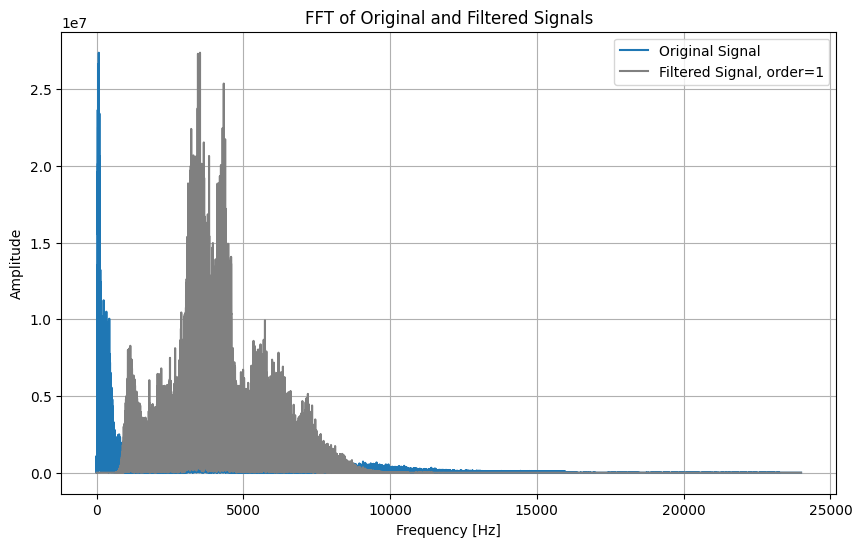

In [ ]:
plot_signal_and_filter(data, sampling_rate, bf7, b7, a7, label=1)

## Save Filtered Bird Sounds

In [ ]:
# original
from IPython.display import Audio
Audio(filepath)

In [ ]:
# save outputs
def save_audio(filename, sampling_rate, data):
    wavfile.write(filename, sampling_rate, data.astype(np.int16))

outpath_bf3=os.path.join(out_dir, 'Filtered_Bird_Sounds_bf3.wav')
outpath_bf5=os.path.join(out_dir, 'Filtered_Bird_Sounds_bf5.wav')
outpath_bf7=os.path.join(out_dir, 'Filtered_Bird_Sounds_bf7.wav')
save_audio(outpath_bf3, sampling_rate, bf3)
save_audio(outpath_bf5, sampling_rate, bf5)
save_audio(outpath_bf7, sampling_rate, bf7)

In [ ]:
# bird_bf3
Audio(outpath_bf3,rate=sampling_rate)

In [ ]:
# bird_bf5
Audio(outpath_bf5,rate=sampling_rate)

In [ ]:
# bird_bf7
Audio(outpath_bf7,rate=sampling_rate)

## Isolate Plane Sounds


In [ ]:
# bandstop
def bandstop_filter(data, sampling_rate, low, high, order=5):
    nyquist = get_nyquist(sampling_rate)
    low = low / nyquist
    high = high / nyquist
    b, a = butter(order, [low, high], btype='bandstop') # IIR
    res = filtfilt(b, a, data)
    return res, b, a

In [ ]:
# experiments with different orders
bsf3, bs3, as3 = bandstop_filter(data, sampling_rate, 1000, 8000, 3)
bsf5, bs5, as5 = bandstop_filter(data, sampling_rate, 1000, 8000, 5)
bsf7, bs7, as7 = bandstop_filter(data, sampling_rate, 1000, 8000, 7)

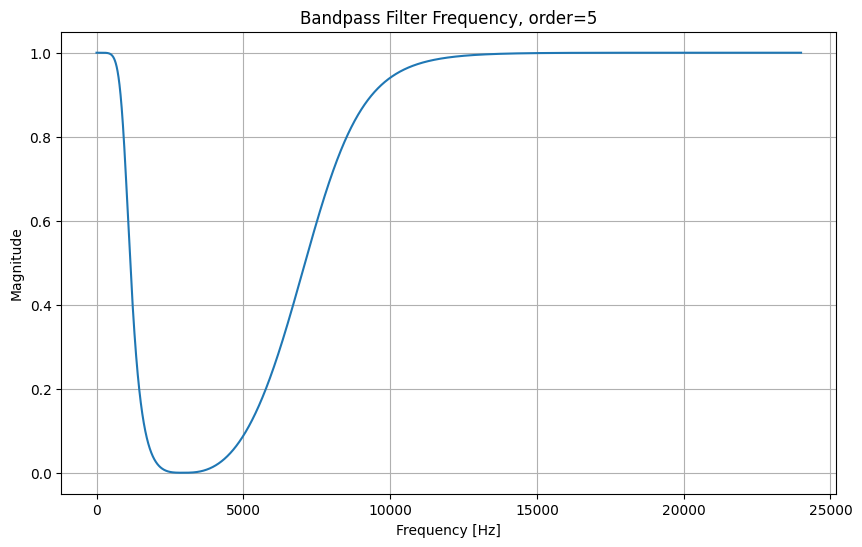

In [ ]:
plot_filter(bs3, as3, sampling_rate)

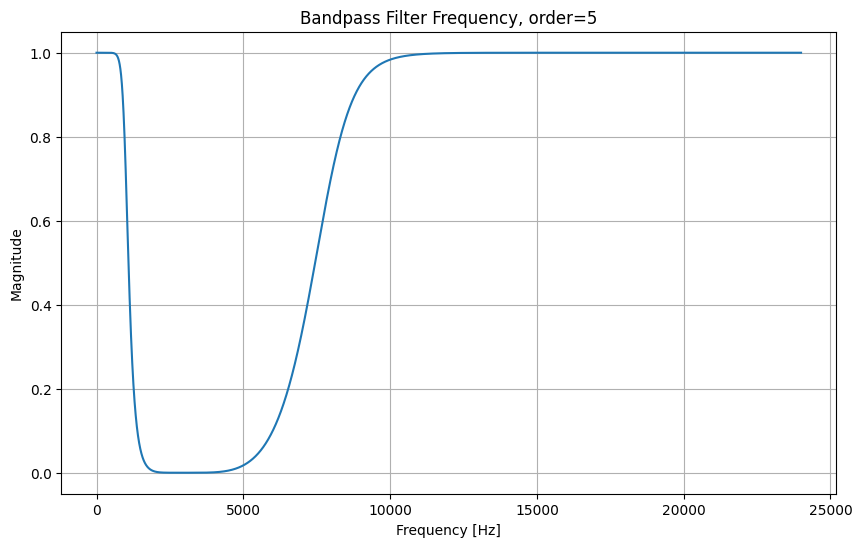

In [ ]:
plot_filter(bs5, as5, sampling_rate)

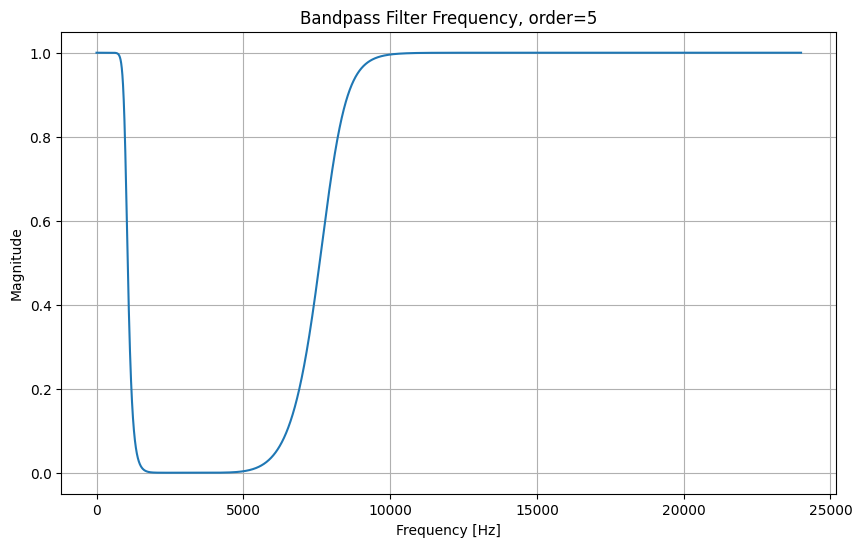

In [ ]:
plot_filter(bs7, as7, sampling_rate)

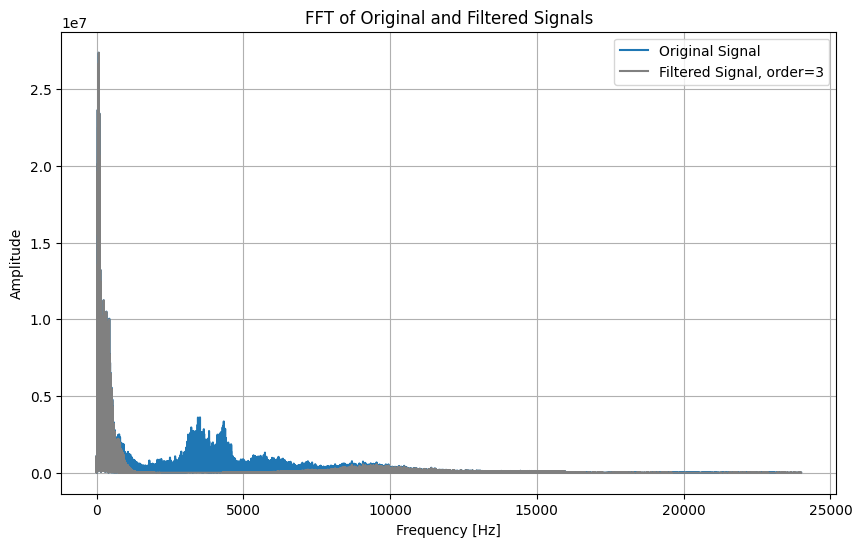

In [ ]:
plot_signal_and_filter(data, sampling_rate, bsf3, bs3, as3, label=3)

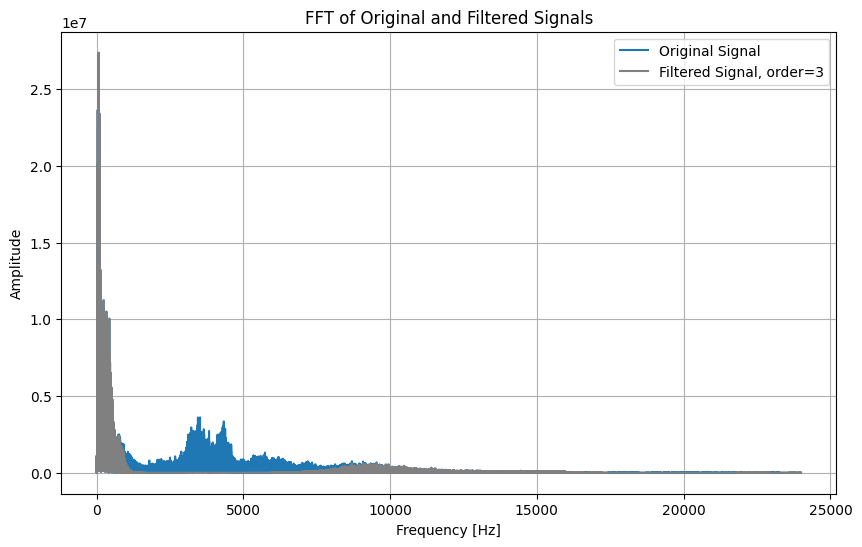

In [ ]:
plot_signal_and_filter(data, sampling_rate, bsf5, bs5, as5, label=3)

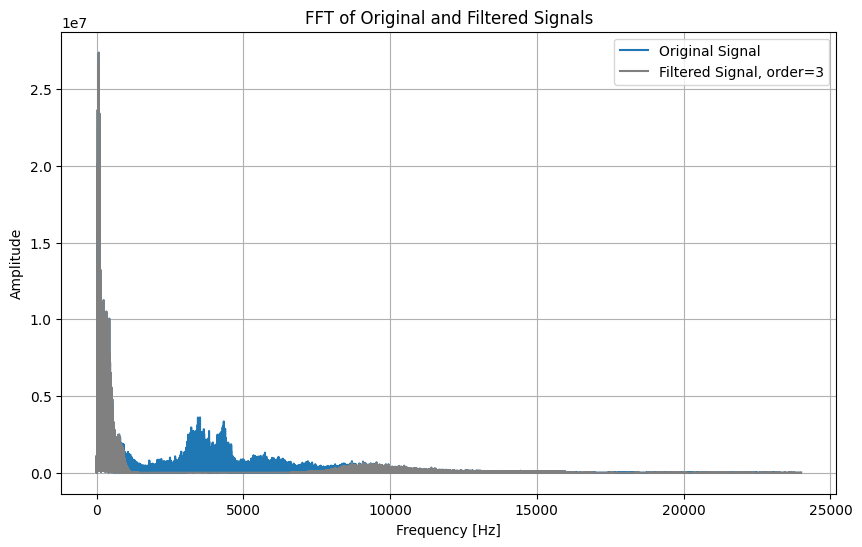

In [ ]:
plot_signal_and_filter(data, sampling_rate, bsf7, bs7, as7, label=3)

In [ ]:
outpath_bsf3=os.path.join(out_dir, 'Filtered_Plane_Sounds_bsf3.wav')
outpath_bsf5=os.path.join(out_dir, 'Filtered_Plane_Sounds_bsf5.wav')
outpath_bsf7=os.path.join(out_dir, 'Filtered_Plane_Sounds_bsf7.wav')
save_audio(outpath_bsf3, sampling_rate, bsf3)
save_audio(outpath_bsf5, sampling_rate, bsf5)
save_audio(outpath_bsf7, sampling_rate, bsf7)

In [ ]:
# plane_bsf3
Audio(outpath_bsf3,rate=sampling_rate)

In [ ]:
# plane_bsf5
Audio(outpath_bsf5,rate=sampling_rate)

In [ ]:
# plane_bsf7
Audio(outpath_bsf7,rate=sampling_rate)